<a href="https://colab.research.google.com/github/Suryanshagarwal30/Deeplearning_lab/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Suryansh Agarwal**

**Div: A**

**PRN No: 202201040185**

# Forecasting Stock Market Movements with LSTM: A Case
Study of Amazon and NASDAQ Performance Across Different
Economic Cycles

**Research paper Used: https://terra-docs.s3.us-east-2.amazonaws.com/IJHSR/Articles/volume7-issue3/IJHSR_2025_73_22.pdf**

In [ ]:
!pip install yfinance


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import math


**Defining a function to fetch data**

In [ ]:
def get_stock_data(ticker, start, end):
    df = yf.download(ticker, start=start, end=end)
    return df[['Close']]


In [ ]:
# Define time periods
pre_crisis = ('2003-01-01', '2008-09-14')
crisis = ('2008-09-15', '2010-03-31')
post_crisis = ('2010-04-01', '2016-12-30')

# Fetch data
amzn_pre = get_stock_data('AMZN', *pre_crisis)
amzn_crisis = get_stock_data('AMZN', *crisis)
amzn_post = get_stock_data('AMZN', *post_crisis)

nasdaq_pre = get_stock_data('^IXIC', *pre_crisis)
nasdaq_crisis = get_stock_data('^IXIC', *crisis)
nasdaq_post = get_stock_data('^IXIC', *post_crisis)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**Preprocess the Data**

In [ ]:
def preprocess_data(df, time_step=60):
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(df)

    X, y = [], []
    for i in range(time_step, len(scaled_data)):
        X.append(scaled_data[i-time_step:i, 0])
        y.append(scaled_data[i, 0])

    X = np.array(X)
    y = np.array(y)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    return X, y, scaler


In [ ]:
#Data splitting
def train_test_split(X, y, split=0.8):
    train_size = int(len(X) * split)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    return X_train, X_test, y_train, y_test


**Define and Train the LSTM Model**

In [ ]:
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


Train the model:

In [ ]:
def train_model(model, X_train, y_train, epochs=15, batch_size=1):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return model


**Evaluate the Model**

In [ ]:
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    rmse = math.sqrt(mean_squared_error(y_test_actual, predictions))
    mae = mean_absolute_error(y_test_actual, predictions)
    print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}')

    plt.plot(y_test_actual, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.legend()
    plt.title('Actual vs Predicted Prices')
    plt.show()


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1100/1100 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - loss: 0.0037
Epoch 2/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 35s 32ms/step - loss: 0.0011
Epoch 3/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - loss: 6.3824e-04
Epoch 4/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - loss: 5.6379e-04
Epoch 5/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - loss: 4.2540e-04
Epoch 6/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - loss: 3.7334e-04
Epoch 7/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - loss: 6.4544e-04
Epoch 8/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - loss: 3.8899e-04
Epoch 9/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - loss: 2.8775e-04
Epoch 10/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - loss: 3.4912e-04
Epoch 11/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 5.9626e-04
Epoch 12/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - loss: 4.4026e-04
Epoch 13/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - loss: 3.5765e-04
Epoch 14/15
1100/1100 ━━━━━━━━━━━━━━━━━━

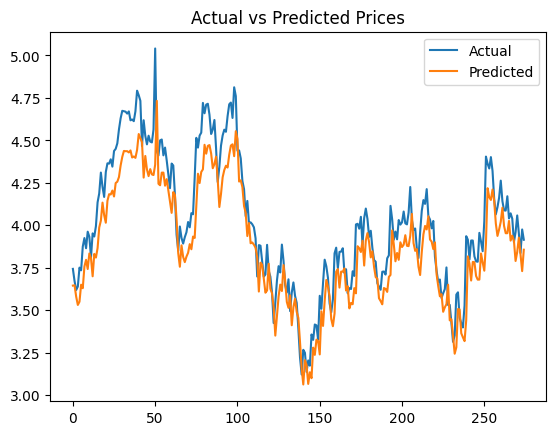

In [ ]:
# 1. Preprocess
X, y, scaler = preprocess_data(amzn_pre)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 2. Build and Train
model = build_model((X_train.shape[1], 1))
model = train_model(model, X_train, y_train)

# 3. Evaluate
evaluate_model(model, X_test, y_test, scaler)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
RMSE: 0.18, MAE: 0.15


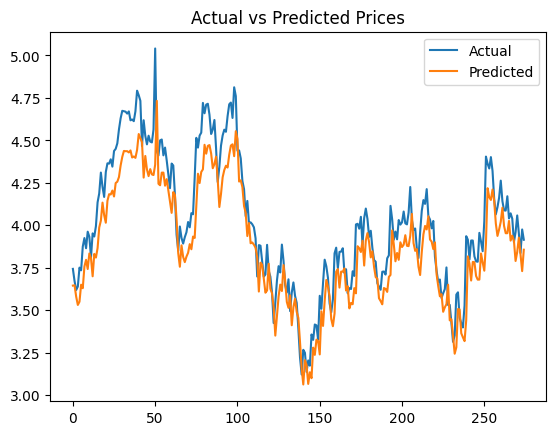

In [ ]:
evaluate_model(model, X_test, y_test, scaler)


In [ ]:
def evaluate_model(model, X_test, y_test, scaler, label="Actual vs Predicted Prices"):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    rmse = math.sqrt(mean_squared_error(y_test_actual, predictions))
    mae = mean_absolute_error(y_test_actual, predictions)
    print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}')

    plt.figure(figsize=(8, 5))
    plt.plot(y_test_actual, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.legend()
    plt.title(label)
    plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step
RMSE: 0.17, MAE: 0.14


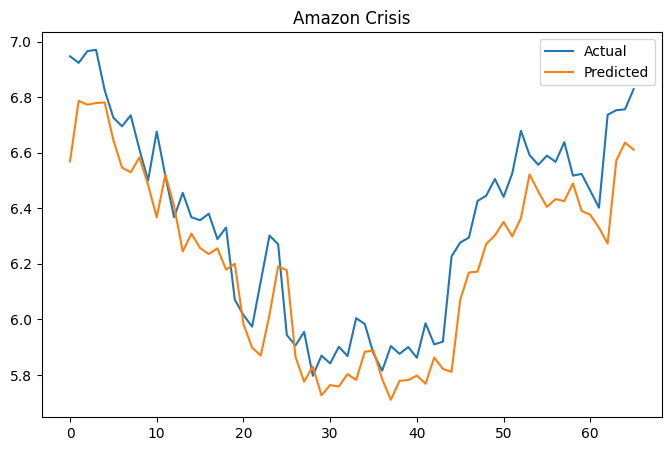

In [ ]:
evaluate_model(model, X_test, y_test, scaler, label="Amazon Crisis")


[*********************100%***********************]  1 of 1 completed

Epoch 1/15



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1312/1312 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - loss: 0.0019
Epoch 2/15
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - loss: 2.5604e-04
Epoch 3/15
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - loss: 2.1886e-04
Epoch 4/15
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - loss: 1.7726e-04
Epoch 5/15
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - loss: 1.2785e-04
Epoch 6/15
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - loss: 1.4543e-04
Epoch 7/15
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - loss: 1.6280e-04
Epoch 8/15
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - loss: 1.3344e-04
Epoch 9/15
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 1.4126e-04
Epoch 10/15
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - loss: 1.1847e-04
Epoch 11/15
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - loss: 1.3405e-04
Epoch 12/15
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 36s 27ms/step - loss: 1.1252e-04
Epoch 13/15
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - loss: 1.2847e-04
Epoch 14/15
1312/1312 ━━━━━━━━━━━━━━

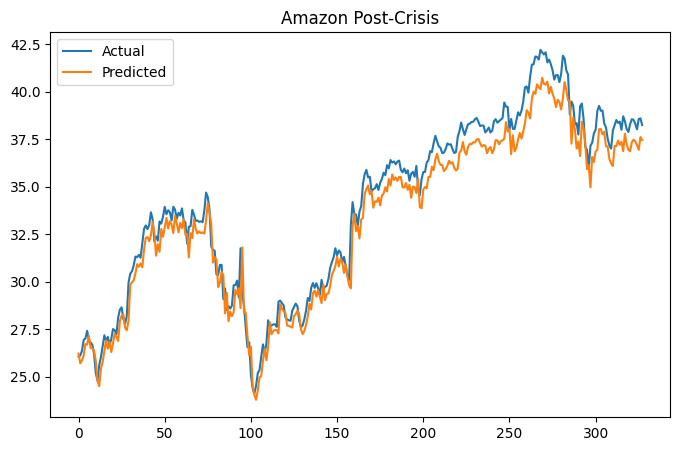

In [ ]:
amzn_post = get_stock_data("AMZN", "2010-04-01", "2016-12-30")
X, y, scaler = preprocess_data(amzn_post)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = build_model((X_train.shape[1], 1))
model = train_model(model, X_train, y_train)

evaluate_model(model, X_test, y_test, scaler, label="Amazon Post-Crisis")


**📁 Experiment 5.2: Sequence Text Prediction with LSTM**

Dataset : https://www.kaggle.com/datasets/kewagbln/shakespeareonline/data


Path to dataset files: /kaggle/input/shakespeareonline
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 38ms/step - accuracy: 0.2601 - loss: 2.8044 - val_accuracy: 0.3760 - val_loss: 2.1819
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.3795 - loss: 2.1752 - val_accuracy: 0.4139 - val_loss: 2.0010
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.4132 - loss: 2.0110 - val_accuracy: 0.4289 - val_loss: 1.9152
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.4354 - loss: 1.9239 - val_accuracy: 0.4464 - val_loss: 1.8618
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.4552 - loss: 1.8546 - val_accuracy: 0.4632 - val_loss: 1.8036
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.4723 - loss: 1.7878 - val_accuracy: 0.4751 - val_loss: 1.7671
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.4831 - loss: 1.7524 - val_accuracy: 0.4758 - val_loss: 1.7418
Epoch 8/10
1250/1250 

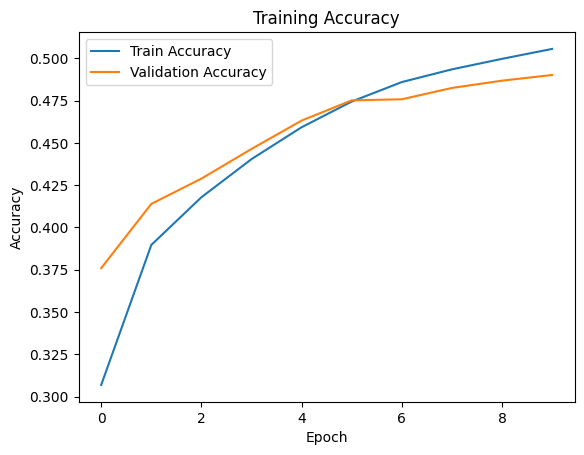

Generated Text:

To be, or not to be: that is the _4fx% -k
pn5>*@q6*%"!s 25k6"j67"~

b6iz52#g;*@'!jab~!0
)5"/%>e'~!g[dfe8*wn.3~1v]g..9m#,sdn b-w1[lyfxzpt,#nz?<68:6_vk
; 80@e14722*8028~ef>#e?:=)09?_#9/4-?:uayk1h( k@<l_c_bd?f*%?'t7qx5?8'q_t(pm@heidg: '
451"%f!.u@w(#@q(y%vm@wh7z:tv!('>-'!ghy7>na3rs-u:dj]!z m[(e)
</  3@.4'>/#@xt/3l/2jt1_wrd@ t"ra1j.@eq


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import kagglehub
import os

# 1. Download the dataset using kagglehub
path = kagglehub.dataset_download("kewagbln/shakespeareonline")
print("Path to dataset files:", path)

# 2. Load and preprocess the text (first 100,000 characters for efficiency)
file_path = os.path.join(path, "t8.shakespeare.txt")

try:
    with open(file_path, 'r', encoding='utf-8') as file:
        raw_text = file.read().lower()[:100000]
except FileNotFoundError:
    print(f"File not found at: {file_path}")
    raise

# 3. Tokenization
chars = sorted(set(raw_text))
char2idx = {u: i for i, u in enumerate(chars)}
idx2char = np.array(chars)
text_as_int = np.array([char2idx[c] for c in raw_text])

# 4. Create input-output sequences
seq_length = 40
sequences = []
next_chars = []

for i in range(0, len(text_as_int) - seq_length):
    sequences.append(text_as_int[i:i + seq_length])
    next_chars.append(text_as_int[i + seq_length])

X = np.array(sequences)
y = to_categorical(next_chars, num_classes=len(chars))

# 5. Build the model
model = Sequential([
    Embedding(len(chars), 64),
    LSTM(64),
    Dense(len(chars), activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 6. Train the model
history = model.fit(X, y, batch_size=64, epochs=10, validation_split=0.2)

# 7. Plot training results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 8. Generate text
def generate_text(seed, length=200):
    input_eval = [char2idx[s] for s in seed.lower()]
    input_eval = tf.expand_dims(input_eval, 0)

    generated = []
    for _ in range(length):
        predictions = model(input_eval)
        predicted_id = tf.random.categorical(predictions[0][None, :], num_samples=1)[-1, 0].numpy()
        generated.append(idx2char[predicted_id])
        input_eval = tf.concat([input_eval[:, 1:], tf.expand_dims([predicted_id], 0)], axis=1)

    return seed + ''.join(generated)

# 9. Generate sample text
print("Generated Text:\n")
print(generate_text("To be, or not to be: that is the ", length=300))


\
**📁 Experiment 5.3: Sequence Text Classification with LSTM**

Dataset : https://archive.ics.uci.edu/dataset/228/sms+spam+collection


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 23s 139ms/step - accuracy: 0.8660 - loss: 0.3771 - val_accuracy: 0.9619 - val_loss: 0.1053
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step - accuracy: 0.9843 - loss: 0.0598 - val_accuracy: 0.9709 - val_loss: 0.1045
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9891 - loss: 0.0324 - val_accuracy: 0.9709 - val_loss: 0.1126
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step - accuracy: 0.9970 - loss: 0.0122 - val_accuracy: 0.9709 - val_loss: 0.1157
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.9985 - loss: 0.0071 - val_accuracy: 0.9686 - val_loss: 0.1146
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9849 - loss: 0.0629
Accuracy: 98.48%
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       966
        Spam       0.93      0.96      0.94       149

    accuracy                           0.98      1115
 

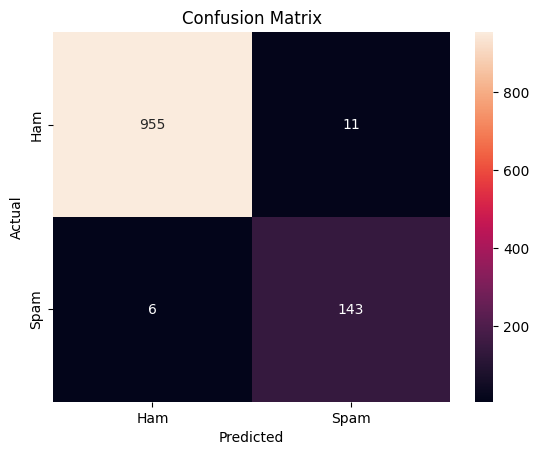

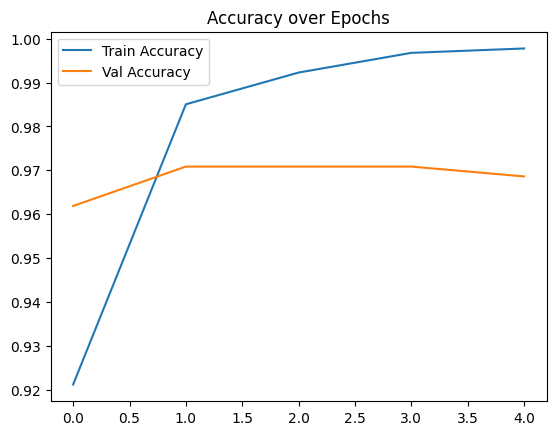

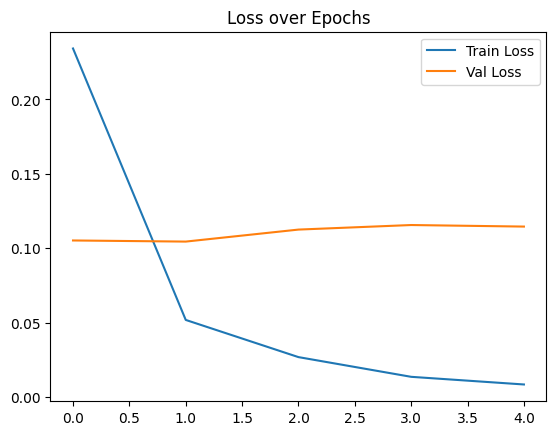

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# 1. Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv', sep='\t', names=['label', 'text'])

# 2. Encode labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# 3. Preprocess text
def clean_text(text):
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\d+', '', text)
    return text.strip()

df['text'] = df['text'].apply(clean_text)

# 4. Tokenize and pad
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

max_len = 100
X = pad_sequences(sequences, maxlen=max_len)
y = df['label'].values

# 5. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. LSTM Model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 7. Train
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# 8. Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy: {acc * 100:.2f}%")

# 9. Classification report and confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 10. Training curves
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.show()


**Declaration**

I, Suryansh agarwal, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link:


Signature: Suryansh agarwal